In [7]:
from astrodbkit import astrodb

In [8]:
db = astrodb.Database("bdnycdev1.db")

Database ready for use


In [9]:
db.info()


Database path: bdnycdev1.db 
SQL path: bdnycdev1.sql

Database Inventory
SOURCES: 1938
CHANGELOG: 205
DATA_REQUESTS: 27
IGNORE: 122
INSTRUMENTS: 54
MODES: 7
PARALLAXES: 436
PHOTOMETRY: 10358
PROPER_MOTIONS: 599
PUBLICATIONS: 607
RADIAL_VELOCITIES: 143
SPECTRA: 3614
SPECTRAL_TYPES: 1511
SYSTEMS: 15
TELESCOPES: 38
VERSIONS: 2


In [10]:
db.help()


The astrodb.Database class, hereafter db, provides a variety of methods to interact with a SQLite database file.
Docstrings are available for all methods and can be accessed in the usual manner; eg, help(db.query).
We list a few key methods below.

    Methods to explore the database:
    * db.query() - send SELECT commands to the database. Returns results in a variety of formats
    * db.info() - get a quick summary of the contents of the database
    * db.schema() - quickly examine the columns, types, etc of a specified table
    * db.search() - search through a table to find entries matching the criteria
    * db.inventory() - search for all entries that match the specified source_id
    * db.references() - search for all entries in all tables matching the criteria. Useful for publications

    Methods to modify the database:
    * db.add_data() - add data to an existing table, either by providing a file or by providing the data itself
    * db.table() - create or modify tables in 

In [11]:
db.inventory(72)


SOURCES
id         ra      dec             designation pub_shortname   unum shortname                   names components companions comments version
-- ---------- -------- ----------------------- ------------- ------ --------- ----------------------- ---------- ---------- -------- -------
72 128.992875 5.808556 2MASS J08355829+0548308       Reid08b U20307 0835+0548 2MASS J08355829+0548308          -          -        -     2.0

PHOTOMETRY
  id     band magnitude magnitude_unc system_id scope_id inst_id pub_shortname epoch comments version
---- -------- --------- ------------- --------- -------- ------- ------------- ----- -------- -------
 956   SDSS_u  24.13363      0.786999         1        1       -             -     -        -       -
 957   SDSS_g  24.11857     0.4055846         1        1       -             -     -        -       -
 958   SDSS_r  21.69148    0.09269092         1        1       -             -     -        -       -
 959   SDSS_i   19.0747    0.01522073         

In [12]:
db.inventory(11)


SOURCES
id        ra        dec designation pub_shortname   unum shortname                          names components companions  comments version
-- --------- ---------- ----------- ------------- ------ --------- ------------------------------ ---------- ---------- --------- -------
11 181.88942 -39.548306      TWA 27       Gizi02b U40008 1207-3932 TWA 27, 2MASS J12073346-393253 1352, 2028          - young/TWA     1.0

PARALLAXES
 id parallax parallax_unc pub_shortname adopted comments version
--- -------- ------------ ------------- ------- -------- -------
128     19.1          0.4        Duco08       -              1.0

PHOTOMETRY
   id     band magnitude magnitude_unc system_id scope_id inst_id pub_shortname      epoch        comments version
----- -------- --------- ------------- --------- -------- ------- ------------- ---------- --------------- -------
 4031  WISE_W2    11.009          0.02         3        3       -        Cutr12          -               -     1.0
 4032  WISE_W

In [19]:
db.query('SELECT ra,dec,shortname FROM sources LIMIT 10', fmt = "pandas")

,ra,dec,shortname
0,254.709737,18.333275,1658+1820
1,202.953870,-1.280556,1331-0116
2,352.756710,-4.105361,2331-0406
3,222.106791,10.533056,1448+1031
4,220.866530,3.281762,1443+0316
5,220.404834,-9.766389,1441-0945
6,219.868167,19.487472,1439+1929
7,262.047250,8.666389,1728+0839
8,197.104460,7.430889,None
9,262.873917,27.356472,1731+2721


In [20]:
OPT_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type,ra,dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='OPT' order by source_id", fmt='pandas')

In [21]:
print(OPT_spectraltype)

           dec          ra   shortname  source_id spectral_type
0    18.333275  254.709737   1658+1820          1          10.0
1    -1.280556  202.953870   1331-0116          2          16.0
2    10.533056  222.106791   1448+1031          4          14.0
3    10.533056  222.106791   1448+1031          4          13.5
4    -9.766389  220.404834   1441-0945          6          10.5
5    19.487472  219.868167   1439+1929          7          11.0
6    27.356472  262.873917   1731+2721         10          10.0
7   -39.548306  181.889420   1207-3932         11           8.0
8     0.734611  342.472709   2249+0044         14          14.0
9     0.734611  342.472709   2249+0044         14          13.0
10   29.355972  332.056790   2208+2921         15          13.0
11  -15.172858  195.477670   1301-1510         16          11.0
12    5.061583    6.924875   0027+0503         17           9.5
13   40.066500  327.068041   2148+4003         19          16.5
14   40.066500  327.068041   2148+4003  

In [52]:
IR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type,ra,dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='IR' order by source_id", fmt='pandas')

In [53]:
print(IR_spectraltype)

          dec       ra   shortname  source_id spectral_type
0    -1.28056  202.954   1331-0116          2          20.0
1     10.5331  222.107   1448+1031          4          14.0
2     10.5331  222.107   1448+1031          4          13.5
3    -39.5483  181.889   1207-3932         11           8.5
4    0.734611  342.473   2249+0044         14          11.0
5    0.734611  342.473   2249+0044         14          15.0
6      29.356  332.057   2208+2921         15          13.0
7     5.06158  6.92488   0027+0503         17           8.0
8     5.06158  6.92488   0027+0503         17          10.0
9     40.0665  327.068   2148+4003         19          16.0
10    40.0665  327.068   2148+4003         19          16.5
11   -34.5099  165.541   1102-3430         20           9.0
12   -57.7605  21.1916   0124-5745         29          10.0
13   -9.58517  63.8314   0415-0935         32          28.0
14     17.167  111.826   0727+1710         34          27.0
15   -21.8667   92.645  0610-2152B      

In [69]:
len(IR_spectraltype)

503

In [27]:
NIR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type,ra,dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='NIR' order by source_id", fmt='pandas')

In [28]:
print(NIR_spectraltype)

          dec          ra  shortname  source_id  spectral_type
0   -4.105361  352.756710  2331-0406          3            8.0
1  -37.628833   15.712500  0102-3737        107            8.0
2  -11.012096  358.021136  2352-1100        146            8.0
3    5.150606  289.240092  1916+0508        300            8.0
4   20.728167  231.558541  1526+2043        353           15.0
5   16.204361  118.099580  0752+1612        358            6.0
6   -2.997467  351.483520  2325-0259        384           13.0
7  -10.239046  148.338620  0953-1014        415            7.5
8  -13.441167  350.302250  2321-1326        433           11.0
9    0.920476  356.412659  2345+0055        525            9.0
10 -30.258694   32.660708  0210-3015        579            9.5
11  32.110361   43.499167  0253+3206        726            6.0
12 -28.673694  343.716417  2254-2840        754           11.0
13  37.046108  108.516439  0714+3702        849            7.5
14  -8.394476  253.897053  1655-0823       1371        

In [29]:
len(NIR_spectraltype)

17

In [73]:
len(OPT_spectraltype)

483

In [74]:
print(NIR_spectraltype("spectral_type"))

TypeError: 'DataFrame' object is not callable

In [75]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'woosh1')

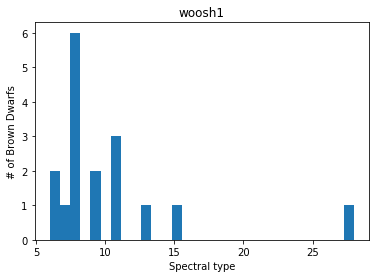

In [117]:
plt.hist(NIR_spectraltype["spectral_type"], bins = 30)
plt.xlabel('Spectral type')
plt.ylabel('# of Brown Dwarfs')
plt.title('woosh1')

In [82]:
len(NIR_spectraltype("spectral_type"))

TypeError: 'DataFrame' object is not callable

In [49]:
noptspectraltype = []
for i in OPT_spectraltype['spectral_type']:
    try:
        float(i)
        noptspectraltype.append(float(i))
    except ValueError:
        print(i , ' cannot be converted')

L1-L4  cannot be converted
0355-type  cannot be converted


In [50]:
print(noptspectraltype)

[10.0, 16.0, 14.0, 13.5, 10.5, 11.0, 10.0, 8.0, 14.0, 13.0, 13.0, 11.0, 9.5, 16.5, 16.0, 8.5, 8.5, 10.0, 13.0, 28.0, 28.0, 10.5, 15.0, 12.0, 16.0, 6.0, 18.0, 9.5, 9.0, 14.0, 12.0, 10.0, 10.0, 15.0, 10.0, 8.5, 9.0, 13.5, 12.0, 12.0, 13.5, 8.5, 17.0, 11.0, 10.0, 8.0, 10.0, 10.0, 12.0, 13.5, 12.5, 9.0, 10.0, 15.0, 15.0, 9.0, 11.5, 8.0, 12.0, 11.0, 8.0, 11.5, 13.0, 10.5, 10.0, 7.0, 12.0, 13.0, 9.0, 15.0, 10.5, 11.0, 7.5, 8.0, 9.0, 12.0, 13.5, 13.5, 7.0, 9.0, 6.5, 12.0, 12.0, 15.0, 10.0, 10.0, 8.0, 10.5, 9.0, 6.0, 11.5, 15.0, 9.5, 7.5, 15.0, 13.0, 10.0, 10.0, 11.5, 13.0, 12.0, 10.0, 12.0, 16.0, 6.0, 18.0, 15.0, 14.0, 10.0, 15.0, 9.0, 10.0, 9.0, 10.0, 14.0, 13.5, 18.0, 8.5, 9.0, 12.0, 15.0, 13.0, 12.0, 15.0, 10.5, 14.5, 27.0, 8.0, 27.0, 14.5, 15.0, 14.0, 11.0, 15.0, 9.0, 14.0, 10.0, 12.0, 15.0, 18.0, 16.0, 11.0, 8.0, 11.0, 8.0, 8.0, 8.0, 10.0, 10.0, 18.0, 11.0, 13.0, 17.0, 14.0, 13.0, 11.0, 11.0, 12.0, 11.0, 8.0, 14.0, 10.0, 11.0, 15.0, 10.0, 18.0, 17.0, 10.0, 14.5, 12.0, 11.0, 8.0, 11.0, 12

In [24]:
i

'10.0'

In [41]:
for i in OPT_spectraltype['spectral_type']:
    print(float(i))

10.0
16.0
14.0
13.5
10.5
11.0
10.0
8.0
14.0
13.0
13.0
11.0
9.5
16.5
16.0
8.5
8.5
10.0
13.0
28.0
28.0
10.5
15.0
12.0
16.0
6.0
18.0
9.5
9.0
14.0
12.0
10.0
10.0
15.0
10.0
8.5
9.0
13.5
12.0
12.0
13.5
8.5
17.0
11.0
10.0
8.0
10.0
10.0
12.0
13.5
12.5
9.0
10.0
15.0
15.0
9.0
11.5
8.0
12.0
11.0
8.0
11.5
13.0
10.5
10.0
7.0
12.0
13.0
9.0
15.0
10.5
11.0
7.5
8.0
9.0
12.0
13.5
13.5
7.0
9.0
6.5
12.0
12.0
15.0
10.0
10.0
8.0
10.5
9.0
6.0
11.5
15.0
9.5
7.5
15.0
13.0
10.0
10.0
11.5
13.0
12.0
10.0
12.0
16.0
6.0
18.0
15.0
14.0
10.0
15.0
9.0
10.0
9.0
10.0
14.0
13.5
18.0
8.5
9.0
12.0
15.0
13.0
12.0
15.0
10.5
14.5
27.0
8.0
27.0
14.5
15.0
14.0
11.0
15.0
9.0
14.0
10.0
12.0
15.0
18.0
16.0
11.0
8.0
11.0
8.0
8.0
8.0
10.0
10.0
18.0
11.0
13.0
17.0
14.0
13.0
11.0
11.0
12.0
11.0
8.0
14.0
10.0
11.0
15.0
10.0
18.0
17.0
10.0
14.5
12.0
11.0
8.0
11.0
12.0
13.0
10.5
10.5
7.5
10.0
8.5
17.0
18.0
9.0
7.0
7.0
23.5
14.0
13.5
14.0
16.0
16.5
7.0
8.0
10.0
15.0
8.5
14.0
13.0
10.0
7.5
11.0
8.0
7.5
14.5
13.0
18.0
13.5
12.0
14.0
8.5
10.

ValueError: could not convert string to float: 'L1-L4'

In [32]:
float("L1-L4")

ValueError: could not convert string to float: 'L1-L4'

In [31]:
int(float("10.5"))

10

In [51]:
irspectraltype = []
for i in IR_spectraltype['spectral_type']:
    try:
        float(i)
        irspectraltype.append(float(i))
    except ValueError:
        print(i , ' cannot be converted')

L7+L8  cannot be converted


In [52]:
print(irspectraltype)

[20.0, 14.0, 13.5, 8.5, 11.0, 15.0, 13.0, 8.0, 10.0, 16.0, 16.5, 9.0, 10.0, 28.0, 27.0, 27.0, 19.0, 14.5, 16.0, 9.5, 9.0, 17.5, 11.0, 10.0, 10.0, 15.0, 14.0, 21.0, 11.0, 11.0, 9.0, 9.0, 12.0, 13.0, 15.0, 11.0, 7.0, 27.0, 9.0, 9.0, 10.0, 10.5, 14.0, 9.0, 10.0, 10.0, 10.0, 16.0, 13.0, 16.0, 14.0, 6.0, 19.5, 14.0, 23.5, 13.0, 10.0, 10.0, 15.5, 18.0, 16.0, 8.5, 13.0, 14.0, 24.5, 26.5, 27.5, 20.0, 16.0, 8.5, 12.0, 12.0, 11.0, 11.0, 11.0, 12.0, 17.5, 18.0, 15.0, 11.0, 11.0, 14.0, 15.0, 10.0, 12.0, 20.0, 9.0, 14.5, 20.5, 23.0, 12.0, 14.0, 17.0, 17.0, 17.5, 8.0, 11.0, 14.0, 12.0, 15.5, 10.0, 9.0, 14.5, 10.0, 11.0, 11.0, 12.5, 10.0, 16.5, 12.0, 21.0, 22.5, 22.0, 13.5, 12.0, 14.0, 13.0, 10.0, 7.0, 9.0, 10.0, 14.0, 26.0, 15.5, 20.0, 16.0, 22.5, 13.0, 11.0, 13.0, 11.0, 21.5, 15.0, 13.0, 10.0, 13.0, 24.5, 11.0, 18.0, 15.0, 10.0, 10.0, 21.5, 12.5, 11.0, 10.0, 24.5, 26.0, 8.5, 15.0, 9.0, 11.0, 11.0, 25.0, 16.5, 17.5, 26.0, 11.0, 15.5, 12.0, 11.5, 13.0, 8.0, 11.0, 12.0, 15.0, 9.5, 16.0, 19.0, 11.0, 9.

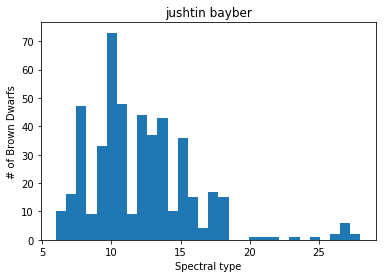

In [115]:
num_bins = 30
plt.hist(noptspectraltype, bins = 30)
plt.xlabel('Spectral type')
plt.ylabel('# of Brown Dwarfs')
plt.title('jushtin bayber')
plt.show()

Text(0.5, 1.0, 'how much wood would a woodchuck chuck')

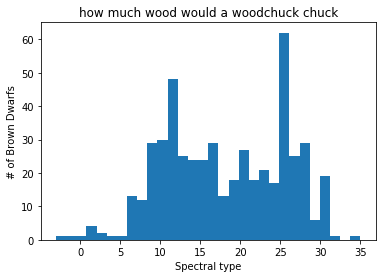

In [116]:
plt.hist(irspectraltype, bins = 30)
plt.xlabel('Spectral type')
plt.ylabel('# of Brown Dwarfs')
plt.title('how much wood would a woodchuck chuck')

In [ ]:
m= 0-9
l = 10-19
t = 20-29
y = 30-39
"obafgkm"

In [31]:
def plotCoords(optspectraltypes, irspectraltypes, nirspectraltypes):
    import astropy.coordinates as coord
    import astropy.units as u
    import matplotlib.pyplot as plt
    import numpy as np
    # ===============================================
    # Plotting coordinates
    # ===============================================

    # converting BDNYC database coordinates for plot
    optspectraltypes_ra = coord.Angle(pd.to_numeric(optspectraltypes['ra']).fillna(np.nan).values*u.degree)
    optspectraltypes_ra = optspectraltypes_ra.wrap_at(180*u.degree)
    optspectraltypes_dec = coord.Angle(pd.to_numeric(optspectraltypes['dec']).fillna(np.nan).values*u.degree)

    # converting matches csv coordinates
    irspectraltypes_ra = coord.Angle(irspectraltypes['RA'].values*u.degree)
    irspectraltypes_ra = irspectraltypes_ra.wrap_at(180*u.degree)
    irspectraltypes_dec = coord.Angle(irspectraltypes['DEC'].values*u.degree)

    # converting new_objects csv coordinates
    nirspectraltypes_ra = coord.Angle(nirspectraltypes['RA'].values*u.degree)
    nirspectraltypes_ra = nirspectraltypes_ra.wrap_at(180*u.degree)
    nirspectraltypes_dec = coord.Angle(nirspectraltypes['DEC'].values*u.degree)
    

    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.set_facecolor('#17303F')
    plt.grid(True)
    ax.scatter(optspectraltypes_ra.radian, optspectraltypes_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='in BDNYC database')
    ax.scatter(irspectraltypes_ra.radian, irspectraltypes_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
    ax.scatter(nirspectraltypes_ra.radian, nirspectraltypes_dec.radian, color="#E3B505", label='in GAIA dataset')
    ax.legend(loc=4)

In [39]:
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
OPT_spectraltype_ra = coord.Angle(pd.to_numeric(OPT_spectraltype['ra']).fillna(np.nan).values*u.degree)
OPT_spectraltype_ra = OPT_spectraltype_ra.wrap_at(180*u.degree)
OPT_spectraltype_dec = coord.Angle(pd.to_numeric(OPT_spectraltype['dec']).fillna(np.nan).values*u.degree)

In [55]:
IR_spectraltype_ra = coord.Angle(IR_spectraltype['ra'].values*u.degree)
IR_spectraltype_ra = IR_spectraltype_ra.wrap_at(180*u.degree)
IR_spectraltype_dec = coord.Angle(IR_spectraltype['dec'].values*u.degree)

In [56]:
NIR_spectraltype_ra = coord.Angle(NIR_spectraltype['ra'].values*u.degree)
NIR_spectraltype_ra = NIR_spectraltype_ra.wrap_at(180*u.degree)
NIR_spectraltype_dec = coord.Angle(NIR_spectraltype['dec'].values*u.degree)

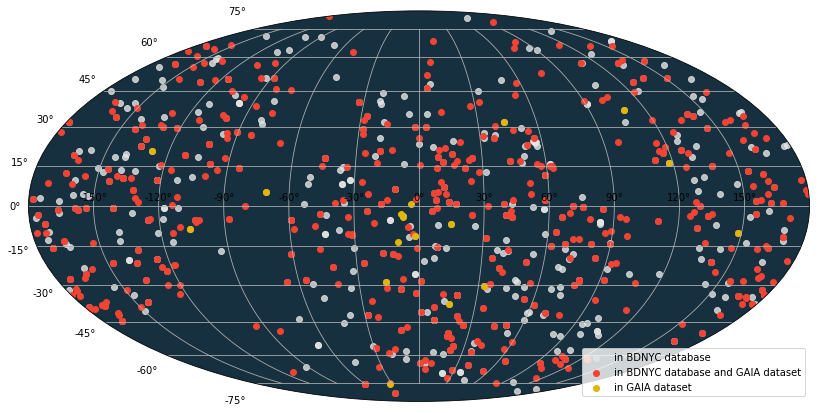

In [59]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(OPT_spectraltype_ra.radian, OPT_spectraltype_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='in BDNYC database')
ax.scatter(IR_spectraltype_ra.radian, IR_spectraltype_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
ax.scatter(NIR_spectraltype_ra.radian, NIR_spectraltype_dec.radian, color="#E3B505", label='in GAIA dataset')
ax.legend(loc=4)

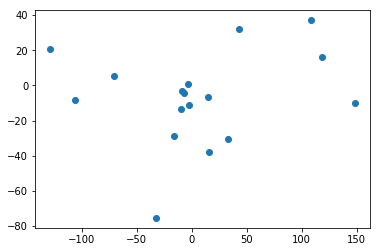

In [92]:
import matplotlib.pyplot as plt

plt.scatter(NIR_spectraltype_ra,NIR_spectraltype_dec)
plt.show()

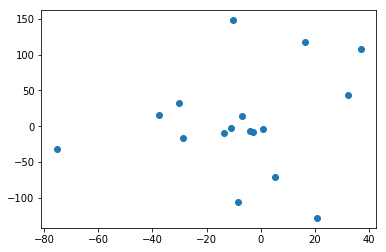

In [93]:
import matplotlib.pyplot as plt

plt.scatter(NIR_spectraltype_dec,NIR_spectraltype_ra)
plt.show()